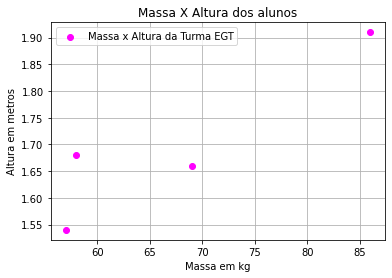

In [1]:
import numpy as np
import matplotlib.pyplot as plt
M=np.array([58,69,86,57])
A=np.array([1.68,1.66,1.91,1.54])
plt.scatter(M,A,color="fuchsia", label="Massa x Altura da Turma EGT")
plt.title("Massa X Altura dos alunos")
plt.xlabel("Massa em kg")
plt.ylabel("Altura em metros")
plt.grid()
plt.legend()
#plt.xlim(0,90)
#plt.ylim(0.5,2)
plt.savefig("MassaAltura.pdf")

In [2]:
ml=np.polyfit(M,A,1)
ml

array([0.01044954, 0.99215596])

In [3]:
a=ml[0]
b=ml[1]
y_ml=a*M+b


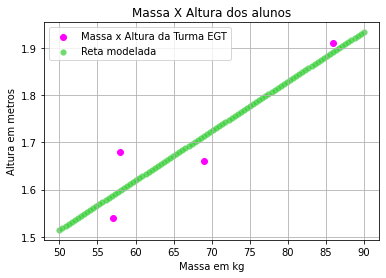

In [4]:
plt.figure(1)
plt.scatter(M,A,color="fuchsia", label="Massa x Altura da Turma EGT")
x=np.linspace(50,90,100)
ymod=a*x+b
plt.scatter(x,ymod,color="limegreen", label="Reta modelada",lw=0.1, alpha=0.7)
plt.title("Massa X Altura dos alunos")
plt.xlabel("Massa em kg")
plt.ylabel("Altura em metros")
plt.grid()
plt.legend()
plt.savefig("AjusteAluno.pdf")



In [5]:
yresid=A-y_ml
SQresid=sum(yresid**2)
y_tot=A-np.mean(A)
SQtotal=sum(y_tot**2)
R2=1-SQresid/SQtotal
print(f'O coeficiente de determinação R^2 é {R2:0.4f}')

O coeficiente de determinação R^2 é 0.8303


## Extrapolação da curva carga recalque - Método de Chin-Kondner
### Método proposto por Chin (1970,1971) para estacas, numa aplicação geral do trabalho de Kondner (1963).
Para aplicar o método Chin-Kondner, divide-se cada recalque com sua carga correspondente
e plota o valor resultante em relação ao recalque. Conforme mostrado, após alguma variação inicial, o gráfico
os valores caem em linha reta. A inclinação inversa desta linha é a extrapolação de Chin-Kondner da
carga de ruptura.

### $$Q_u=\frac{1}{C_1}$$
onde:

$Q_u$ = Carga última (limite); e

$C_1$ = Coeficiente angular

A equação para a curva ideal é dada por:
$$Q=\frac{\delta}{C_1\delta+C_2}$$

onde:

$C_2$ = Intercepto;

$Q$ = Carga aplicada;e

$\delta$ = Recalque

## Estaca Escavada
## L = 7,65 m
## Diâmetro = 0,30 m
## Módulo de elasticidade = 15 GPa

In [6]:
carga = np.array([0,30,60,90,120,150,180,210,240,270,220,170,120,70,23,0])
rec = np.array([0,0.81,1.15,1.55,2.1,2.69,3.38,3.96,6.04,16.1,16.09,15.99,15.9,15.58,15,14.94])

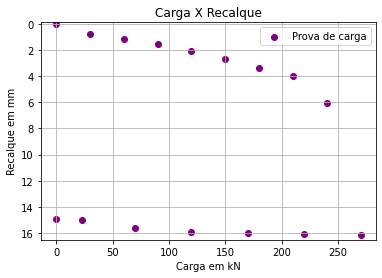

In [7]:
plt.scatter(carga, rec, color="purple", label="Prova de carga") 
plt.title("Carga X Recalque")
plt.xlabel("Carga em kN")
plt.ylabel("Recalque em mm")
plt.ylim(16.5,-0.1)
plt.grid()

plt.legend()
plt.savefig("ProvaCarga_E1.pdf")

## Vamos considerar a carga até a última carga ensaiada, antes do descarregamento. Assim:

In [8]:
delta=rec[1:10]
Q=carga[1:10]

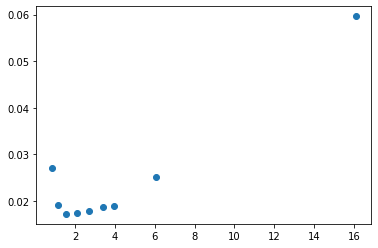

In [9]:
plt.scatter(delta,(delta/Q))


In [10]:
x=delta[6:9]
y=delta[6:9]/Q[6:9]
modelo=np.polyfit(x,y,1)
modelo

array([0.00337986, 0.00514636])

In [11]:
C1=modelo[0]
C2=modelo[1]
C2

0.005146358684692535

In [12]:
print(f'A carga última é {1/C1:0.2f} kN')

A carga última é 295.87 kN


In [13]:
rho=np.linspace(0,30,100)
P=rho/(rho*C1+C2)

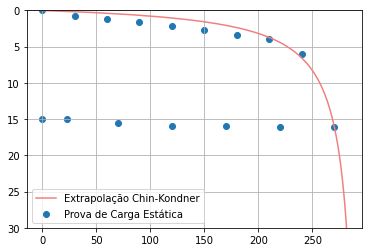

In [14]:
plt.plot(P,rho,color="lightcoral", label="Extrapolação Chin-Kondner")
plt.scatter(carga,rec,label="Prova de Carga Estática")
plt.ylim(30,-0.01)
plt.grid()
plt.legend()
plt.savefig("Chin-Kondner.pdf")

In [15]:
T1=np.array([150,300,450,600,750,900])
rho=np.array([0.11,0.5,1.24,2.02,3.46,6.66])

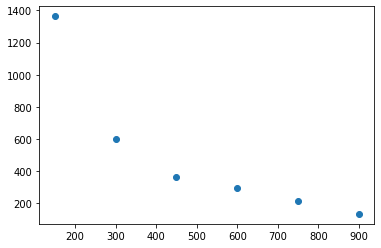

In [16]:
plt.scatter(T1,(T1/rho))

In [17]:
T1

array([150, 300, 450, 600, 750, 900])

In [18]:
X=T1[2:6]
Y=T1[2:6]/rho[2:6]
modelo2=np.polyfit(X,Y,1)

In [19]:
modelo2

array([-5.09047313e-01,  5.96564704e+02])

In [20]:
C1=modelo2[0]
C2=modelo2[1]
print(f'A carga última é {C2/C1:0.2f} kN')

A carga última é -1171.92 kN


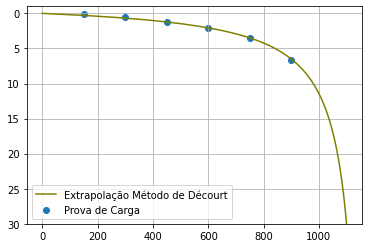

In [21]:
plt.figure(2)
rho2=np.linspace(0,30,100)
P=(C2*rho2)/(1-(rho2*C1))
plt.scatter(T1,rho, label="Prova de Carga")
plt.plot(P,rho2, color='olive', label="Extrapolação Método de Décourt")
plt.legend()
plt.grid()
plt.ylim(30,-1)
plt.savefig("Decourt2.pdf")

